In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

import warnings 
warnings.simplefilter('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Load the California housing dataset from sklearn
california = fetch_california_housing(
    as_frame=True)
df = california.frame

# Show the first few rows of the data
df.shape
df.head()
df.info()

(20640, 9)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
# Check for missing values in the dataset
df.isnull().sum()

# Display summary statistics for the features
df.describe()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

X.shape, y.shape

((20640, 8), (20640,))

In [6]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2 
    , random_state=27
)

In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both train and test sets
scaled_X_train = scaler.fit_transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [9]:
# Set up and fit the base model

from sklearn.neighbors import KNeighborsRegressor

# Initialize KNeighborsRegressor with default parameters
knn_reg = KNeighborsRegressor()

# Fit the model on the scaled training data
knn_reg.fit(scaled_X_train, y_train)

KNeighborsRegressor()

In [9]:
# Predict on the test set
# y_pred = knn_reg.predict(scaled_X_train)

In [10]:
from sklearn.model_selection import GridSearchCV

# Set up parameter grid for KNeighborsRegressor
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19] # Using odd numbers to avoid 'ties'
    , 'weights': ['uniform', 'distance'] # distance will likely win every time, but worth seeing in action
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=KNeighborsRegressor()
    , param_grid=param_grid
    , cv=5
    , scoring='neg_mean_squared_error'
    , n_jobs=-1
)

# Fit grid search on the scaled training data
grid_search.fit(scaled_X_train, y_train)

# Best hyperparameters
grid_search.best_params_

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

{'n_neighbors': 13, 'weights': 'distance'}

In [11]:
# Retrieve the best estimator from grid search
best_knn = grid_search.best_estimator_

# Predict on the test set with the best model
y_pred_best = best_knn.predict(scaled_X_test)

In [13]:
grid_search.best_params_['n_neighbors']

13

In [19]:
# Metrics for the best model
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"K-Value Best: {grid_search.best_params_['n_neighbors']}, \nMSE Best: {mse_best}, \nRMSE Best: {rmse_best}, \nMAE Best: {mae_best}, \nR2 Best: {r2_best}")

K-Value Best: 13, 
MSE Best: 0.41194743454190175, 
RMSE Best: 0.6418313131515957, 
MAE Best: 0.43767970559212815, 
R2 Best: 0.6875697741721505


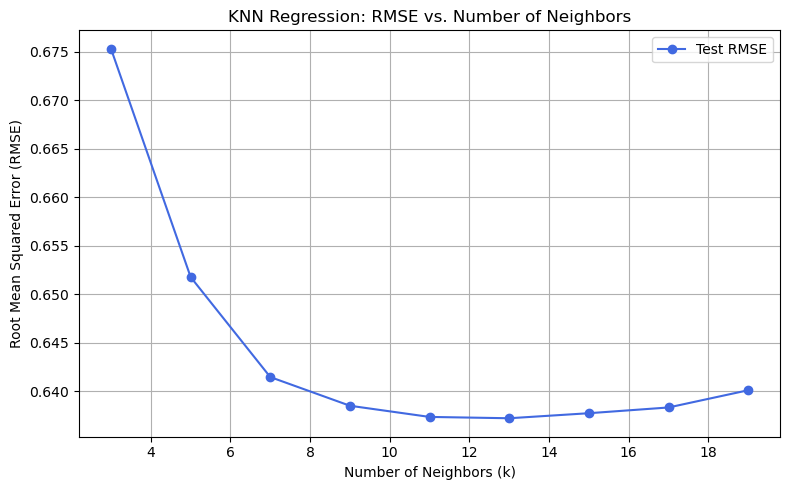

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Get all parameter combinations and scores from grid search
results = pd.DataFrame(grid_search.cv_results_)

# Group by 'param_n_neighbors' and take the best (max) mean_test_score for each k
# Since scores are negative MSE, higher (closer to 0) is better

k_values = param_grid['n_neighbors']
best_scores_per_k = []

for k in k_values:
    # Filter results for current k
    scores_k = results[results['param_n_neighbors'] == k]['mean_test_score']
    # Take the best score (max, since less negative is better)
    best_scores_per_k.append(scores_k.max())

# Convert negative MSE to RMSE (since MSE is negative, take -score then sqrt)
rmse_per_k = [np.sqrt(-score) for score in best_scores_per_k]

plt.figure(figsize=(8, 5))
plt.plot(
      k_values
    , rmse_per_k
    , marker='o'
    , color='royalblue'
    , label='Test RMSE'
)

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('KNN Regression: RMSE vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show();

In [25]:
# Since we have a few k-vals that are fairly close to the CV choice, lets check the top 3:
results[results['rank_test_score'] <= 3].sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.013628,0.001324,0.411682,0.067152,13,distance,"{'n_neighbors': 13, 'weights': 'distance'}",-0.434394,-0.410233,-0.409445,-0.393408,-0.382697,-0.406036,0.017536,1
9,0.013877,0.001964,0.409231,0.058444,11,distance,"{'n_neighbors': 11, 'weights': 'distance'}",-0.436740,-0.408152,-0.408013,-0.394480,-0.383667,-0.406210,0.017804,2
13,0.012913,0.001047,0.425156,0.067200,15,distance,"{'n_neighbors': 15, 'weights': 'distance'}",-0.434344,-0.409971,-0.409162,-0.395303,-0.384706,-0.406697,0.016701,3


In [34]:
# Another option:
# Extract results as a DataFrame for easy sorting and display
results = pd.DataFrame(grid_search.cv_results_)

# Compute RMSE from negative mean squared error
results['RMSE'] = np.sqrt(-results['mean_test_score'])

# Select relevant columns for display
display_cols = [
      'param_n_neighbors'
    , 'param_weights'
    , 'RMSE'
]

# Sort by RMSE ascending (lowest errors first)
top5 = results[display_cols].sort_values('RMSE').head(5)

# Rename columns for clarity
top5 = top5.rename(columns={
      'param_n_neighbors': 'Neighbors'
    , 'param_weights': 'Weights'
})

# Display the top 5 parameter sets with lowest RMSE
top5.reset_index(drop=True)

,Neighbors,Weights,RMSE
0,13,distance,0.637209
1,11,distance,0.637346
2,15,distance,0.637728
3,17,distance,0.638321
4,9,distance,0.638498


In [26]:
# Since we can see k=11 is almost as good (RMSE) as k=13 but slightly less complex, lets try it:

knn_elbow = KNeighborsRegressor(
    n_neighbors=11, weights='distance')

knn_elbow.fit(scaled_X_train, y_train)

KNeighborsRegressor(n_neighbors=11, weights='distance')

In [27]:
# Predict on the test set
y_pred_elbow = knn_elbow.predict(scaled_X_test)

In [28]:
knn_elbow.n_neighbors

11

In [29]:
# Calculate Mean Squared Error (MSE)
mse_e = mean_squared_error(y_test, y_pred_elbow)

# Calculate Root Mean Squared Error (RMSE)
rmse_e = np.sqrt(mse_e)

# Calculate Mean Absolute Error (MAE)
mae_e = mean_absolute_error(y_test, y_pred_elbow)

# Calculate R^2 Score
r2_e = r2_score(y_test, y_pred_elbow)

# Show results
# mse_e, rmse_e, mae_e, r2_e
print(f"Elbow K Value: {knn_elbow.n_neighbors}, \nMSE Elbow: {mse_e}, \nRMSE Elbow: {rmse_e}, \nMAE Elbow: {mae_e}, \nR2 Elbow: {r2_e}")

Elbow K Value: 11, 
MSE Elbow: 0.4108474066144371, 
RMSE Elbow: 0.6409737955754798, 
MAE Elbow: 0.43659762289647747, 
R2 Elbow: 0.6884040601634612
